
___
## Recommender Systems with Python

#### On ratings, Pivot Tables

Welcome to the code notebook for Recommender Systems with Python. In this lecture we will develop basic recommendation systems using Python and pandas.

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, companies.


## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Get the Data

In [2]:

xl = pd.ExcelFile('ratings.xlsx')
df1 = xl.parse('Sheet1')

In [3]:
df1.head()

,user_id,item_id,rating,timestamp
0,28,3,2,2013-07-04 19:4:25
1,16,24,4,2011-07-15 10:2:12
2,24,39,5,2011-08-25 19:34:13
3,9,18,1,2010-04-26 18:39:6
4,23,29,3,2008-10-25 14:49:47


Now let's get the company titles:

In [4]:
xl1 = pd.ExcelFile('redcrow_company_list.xlsx')
company_titles = xl1.parse('Sheet1')
company_titles.head()

,item_id,title
0,1,Acclinate Genetics
1,2,Activ Surgical
2,3,AIM Medical Robotics
3,4,AMChart
4,5,AngioInsight Inc


We can merge them together:

In [5]:
df = pd.merge(df1,company_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,28,3,2,2013-07-04 19:4:25,AIM Medical Robotics
1,17,3,4,2009-07-25 13:55:2,AIM Medical Robotics
2,30,3,3,2013-01-08 14:1:26,AIM Medical Robotics
3,28,3,3,2011-01-23 16:55:0,AIM Medical Robotics
4,30,3,1,2009-10-01 23:23:34,AIM Medical Robotics


# EDA

Let's explore the data a bit and get a look at some of the best rated companies.

## Visualization Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a ratings dataframe with average rating and number of ratings:

In [7]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
EndoPro Solutions        4.125000
Brilliantly              3.700000
AMChart                  3.666667
Hyperion Laboratories    3.600000
Immplacate Inc           3.454545
Name: rating, dtype: float64

In [8]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Clear Protocol            22
Maternity Partners LLC    19
Maculus Therapeutix       19
Healthy Within            18
Avitus Orthopaedics       18
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
AIM Medical Robotics,2.692308
AMChart,3.666667
ARIZ Precision Medicine,2.416667
Acclinate Genetics,3.285714
Activ Surgical,2.666667


Now set the number of ratings column:

In [10]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
AIM Medical Robotics,2.692308,13
AMChart,3.666667,15
ARIZ Precision Medicine,2.416667,12
Acclinate Genetics,3.285714,14
Activ Surgical,2.666667,9


Now a few histograms:

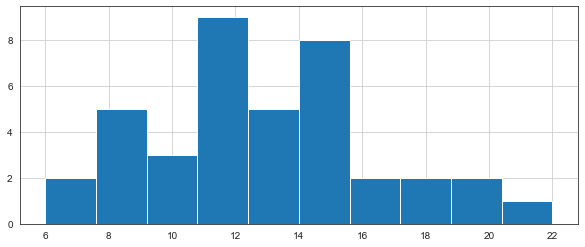

In [11]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist()

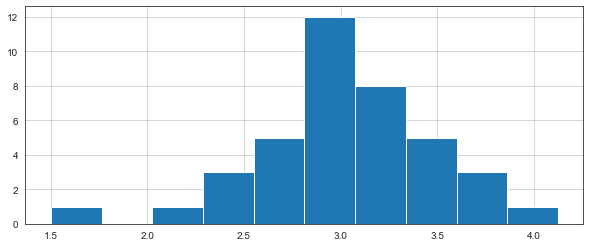

In [12]:
plt.figure(figsize=(10,4))
ratings['rating'].hist()

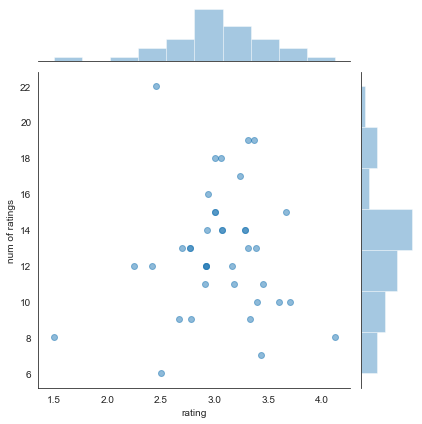

In [13]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Okay! Now that we have a general idea of what the data looks like, let's move on to creating a simple recommendation system:

## Recommending Similar Company

Now let's create a matrix that has the user ids on one access and the company title on another axis. Each cell will then consist of the rating the user gave to that company. Note there will be a lot of NaN values, because most people didn't give rating to all companys.

In [14]:
companymat = df.pivot_table(index='user_id',columns='title',values='rating')
companymat.head()

title,AIM Medical Robotics,AMChart,ARIZ Precision Medicine,Acclinate Genetics,Activ Surgical,AngioInsight Inc,AniCell Biotech,Appairy Medical,Articulate Labs,Avitus Orthopaedics,...,Gravity Therapy,Healora DirectPay Healthcare,Healthy Within,Hyperion Laboratories,I-Lu Technologies Inc (HOOP),Immplacate Inc,Ionica Sciences Inc,Livia Medicines,Maculus Therapeutix,Maternity Partners LLC
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,3.0,4.0,4.0,5.0,NaN,NaN,5.0,2.0,...,5.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,4.5,NaN
2,2.0,4.0,3.0,NaN,NaN,4.5,1.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,5.0,NaN
3,2.0,NaN,NaN,3.0,4.0,NaN,3.0,1.0,1.0,4.0,...,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN
5,3.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,2.0,3.5,NaN,NaN,4.0,NaN,2.5,5.0


Most rated company:

In [15]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Clear Protocol,2.454545,22
Maternity Partners LLC,3.368421,19
Maculus Therapeutix,3.315789,19
Avitus Orthopaedics,3.000000,18
Healthy Within,3.055556,18
Corline Systems,3.235294,17
Bone Health Technologies,2.937500,16
AMChart,3.666667,15
Ensysce Biosciences,3.000000,15


In [16]:
ratings.head()

,rating,num of ratings
title,,
AIM Medical Robotics,2.692308,13
AMChart,3.666667,15
ARIZ Precision Medicine,2.416667,12
Acclinate Genetics,3.285714,14
Activ Surgical,2.666667,9


Now let's grab the user ratings for those two companies:

In [17]:
Com1 = 'AMChart'
Com2 = 'Brilliantly'

company1_user_ratings = companymat[Com1]
company2_user_ratings = companymat[Com2]
company1_user_ratings.head()

user_id
1    NaN
2    4.0
3    NaN
4    NaN
5    4.0
Name: AMChart, dtype: float64

We can then use corrwith() method to get correlations between two pandas series:

In [18]:
similar_to_company1 = companymat.corrwith(company1_user_ratings)
similar_to_company2 = companymat.corrwith(company2_user_ratings)

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame instead of a series:

In [19]:
corr_company1 = pd.DataFrame(similar_to_company1,columns=['Correlation'])
corr_company1.dropna(inplace=True)
corr_company1.head()

,Correlation
title,
AIM Medical Robotics,0.760007
AMChart,1.000000
ARIZ Precision Medicine,0.101030
Acclinate Genetics,0.921551
AngioInsight Inc,0.000000


Now if we sort the dataframe by correlation, we should get the most similar comapnies.

In [20]:
corr_company1.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Fan Health Network,1.000000
AMChart,1.000000
BabyliveAdvice,1.000000
Brilliantly,0.970725
Acclinate Genetics,0.921551
I-Lu Technologies Inc (HOOP),0.866025
AIM Medical Robotics,0.760007
Gravity Therapy,0.701561
Immplacate Inc,0.612372


Let's fix this by filtering out companies that have less than 10 reviews (this value was chosen based off the histogram from earlier).

In [21]:
corr_company1 = corr_company1.join(ratings['num of ratings'])
corr_company1.head()

,Correlation,num of ratings
title,,
AIM Medical Robotics,0.760007,13
AMChart,1.000000,15
ARIZ Precision Medicine,0.101030,12
Acclinate Genetics,0.921551,14
AngioInsight Inc,0.000000,14


Now sort the values and notice how the titles make a lot more sense:

In [22]:
corr_company1[corr_company1['num of ratings']>10].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
AMChart,1.000000,15
Acclinate Genetics,0.921551,14
AIM Medical Robotics,0.760007,13
Gravity Therapy,0.701561,14
Immplacate Inc,0.612372,11


# Now the same for the company2:

In [23]:
corr_company2 = pd.DataFrame(similar_to_company2,columns=['Correlation'])
corr_company2.dropna(inplace=True)
corr_company2 = corr_company2.join(ratings['num of ratings'])
corr_company2[corr_company2['num of ratings']>10].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Deep Sleep Boost Inc,1.000000,15
AMChart,0.970725,15
Breath Diagnostics,0.970725,13
AngioInsight Inc,0.944911,14
Acclinate Genetics,0.878310,14
